# sampling under class imbalance
two kinds:
- Synthetic Minority Over-Sampling Technique (SMOTE), in imblearn
    - More information about SMOTE [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
    - "The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class."
- Random Over-Sampling Examples (ROSE)

In [17]:
import pandas as pd
df_read = pd.read_csv("../data/acled/darfur.csv")
df_read.columns

selected_columns = ['LATITUDE', 'LONGITUDE', 'FATALITIES', 'TIMESTAMP']
df = df_read[selected_columns].copy()
df["y_true"] = (df["FATALITIES"] > 10).astype(int)
print(df.head())

   LATITUDE  LONGITUDE  FATALITIES   TIMESTAMP  y_true
0     9.616     27.499           2  1687837306       0
1     9.616     27.499          11  1673906973       1
2     9.604     27.734          15  1649110873       1
3     9.616     27.499           5  1673906973       0
4     9.616     27.499           1  1673906973       0


In [18]:
df["y_true"].value_counts()

0    8630
1     686
Name: y_true, dtype: int64

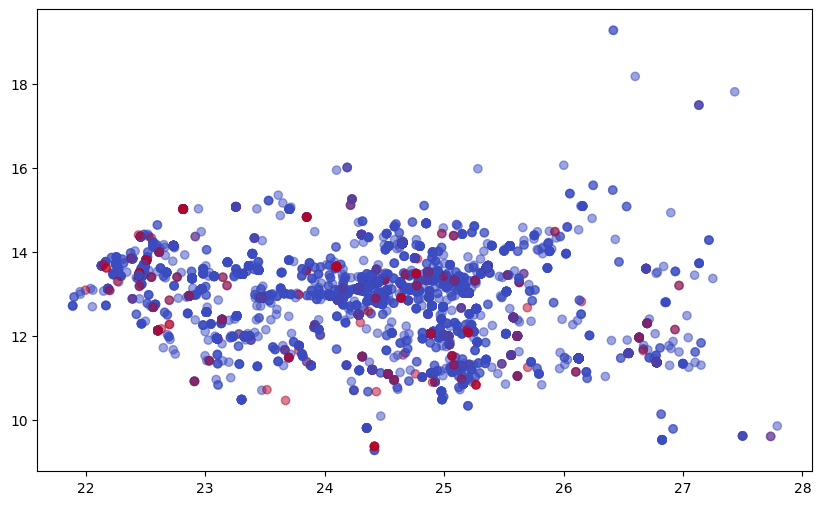

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df["LONGITUDE"], y=df["LATITUDE"], c=df["y_true"], cmap="coolwarm", alpha=0.5)

In [32]:
from imblearn.over_sampling import SMOTE

X = df.drop(["y_true", "FATALITIES"], axis=1)
y = df["y_true"]

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

y.value_counts()

0    8630
1    8630
Name: y_true, dtype: int64

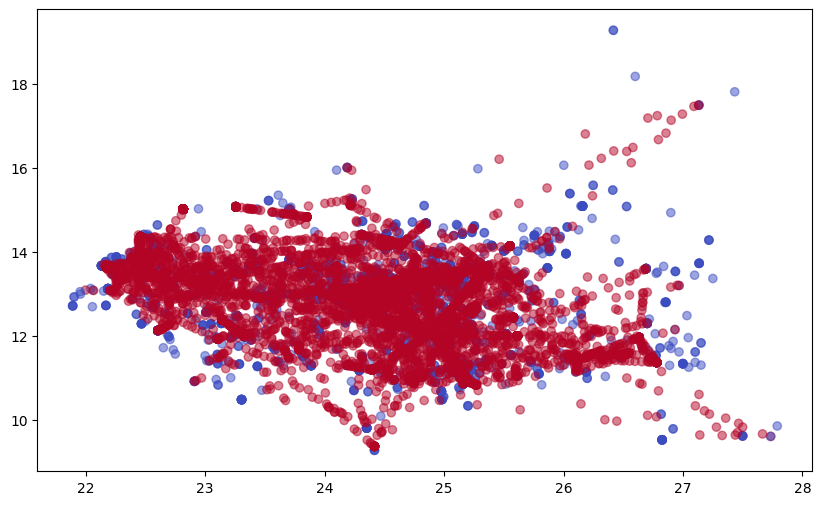

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=X["LONGITUDE"], y=X["LATITUDE"], c=y, cmap="coolwarm", alpha=0.5)

In [34]:
filename = 'darfur_oversampled.csv'
pd.concat([X, y], axis=1).to_csv(filename, index=False)
    